# Count Vectorizer/ TF-ID Vect and Sentimental Analysis

In [1]:
# Data Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Word Model imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [2]:
protest = pd.read_csv("../Data/integrated_protest.csv") # read in data

In [3]:
protest.columns # check the columns

Index(['id', 'date', 'month', 'year', 'city', 'state', 'time_precision',
       'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1',
       'type_actor1', 'actor2', 'assoc_actor_2', 'type_actor2', 'interaction',
       'notes', 'fatalities', 'county', 'latitude', 'longitude',
       'geo_precision', 'source_x', 'source_scale', 'attendees', 'tags',
       'curated', 'source_y', 'total_articles', 'totalpop', 'povertyrate',
       'blackpop', 'blackpovertyrate', 'asianpop', 'asianpoverty',
       'hispanicpop', 'hispanicpoverty', 'whitepop', 'whitepovertyrate',
       'percentbachelor', 'sqmiles', 'deaths', 'deaths_unarmed',
       'deaths_unarmed_black', 'deaths_armed_black', 'deaths_black',
       'deaths_protestyear', 'deaths_protestyear_unarmed', 'naacpyears',
       'mayorpartisanship', 'blackmayor', 'dem', 'rep', 'dem_share', 'pop',
       'hbcu', 'hbcu2', 'crime', 'deathduring', 'per_ba', 'per_black',
       'pop_density', 'collegeenrollpc', 'mayorrep', 'unarmed_deaths_pc',
 

In [4]:
protest # see how the df ouputs

,id,date,month,year,city,state,time_precision,event_type,sub_event_type,actor1,...,deathduring,per_ba,per_black,pop_density,collegeenrollpc,mayorrep,unarmed_deaths_pc,deaths_pc,unarmed_deaths_black_pc,deaths_black_pc
0,2020-01-01_cleveland_oh,2020-01-01,1,2020,cleveland,oh,1,Protests,Peaceful protest,Protesters (United States),...,1.0,15.344030,52.543568,4917.840708,11.794585,0.0,0.026210,0.052420,0.026210,0.026210
1,2020-01-01_rochester_ny,2020-01-01,1,2020,rochester,ny,1,Protests,Peaceful protest,Protesters (United States),...,1.0,24.521139,41.828799,5633.751292,7.435350,0.0,0.000000,0.049569,0.000000,0.049569
2,2020-01-01_oakland_ca,2020-01-01,1,2020,oakland,ca,1,Protests,Peaceful protest,Protesters (United States),...,0.0,38.786488,26.122586,7106.899885,2.519126,0.0,0.050383,0.151148,0.025191,0.075574
3,2020-01-01_phoenix_az,2020-01-01,1,2020,phoenix,az,1,Protests,Peaceful protest,Protesters (United States),...,1.0,26.665009,6.802070,2859.173515,1.018071,0.0,0.033936,0.190040,0.013574,0.020361
4,2020-01-01_oklahoma_city_ok,2020-01-01,1,2020,oklahoma_city,ok,1,Protests,Peaceful protest,Protesters (United States),...,1.0,28.818236,14.450975,971.028426,0.424554,1.0,0.016982,0.220768,0.000000,0.101893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27624,2021-03-05_fayetteville_nc,2021-03-05,3,2021,fayetteville,nc,1,Protests,Peaceful protest,Protesters (United States),...,0.0,25.414259,41.915571,1315.386303,11.730542,1.0,0.000000,0.208543,0.000000,0.156407
27625,2021-03-05_salisbury_nc,2021-03-05,3,2021,salisbury,nc,1,Protests,Peaceful protest,Protesters (United States),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27626,2021-03-05_verona_nj,2021-03-05,3,2021,verona,nj,1,Protests,Peaceful protest,Protesters (United States),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27627,2021-03-05_minneapolis_mn,2021-03-05,3,2021,minneapolis,mn,1,Protests,Peaceful protest,Protesters (United States),...,0.0,47.561009,17.989143,6916.799007,11.215999,0.0,0.000000,0.052781,0.000000,0.026391


In [5]:
protest.isnull().sum() # check for nulls

id                            0
date                          0
month                         0
year                          0
city                          0
                           ... 
mayorrep                   9994
unarmed_deaths_pc          9994
deaths_pc                  9994
unarmed_deaths_black_pc    9994
deaths_black_pc            9994
Length: 68, dtype: int64

In [6]:
protest.select_dtypes(include='object').isnull().sum() # check for nulls in only string columns

id                       0
date                     0
city                     0
state                    0
event_type               0
sub_event_type           0
actor1                   0
assoc_actor_1         7459
actor2               23602
assoc_actor_2        26281
notes                    0
county                   5
source_x                 0
source_scale             0
tags                 14237
curated              14237
source_y             14237
mayorpartisanship    10293
dtype: int64

In [7]:
protest.select_dtypes(exclude='object').isnull().sum() # check for nulls in only numeric columns

month                             0
year                              0
time_precision                    0
type_actor1                       0
type_actor2                       0
interaction                       0
fatalities                        0
latitude                          0
longitude                         0
geo_precision                     0
attendees                     11372
total_articles                14237
totalpop                       9994
povertyrate                    9994
blackpop                       9994
blackpovertyrate               9994
asianpop                       9994
asianpoverty                   9994
hispanicpop                    9994
hispanicpoverty                9994
whitepop                       9994
whitepovertyrate               9994
percentbachelor                9994
sqmiles                        9994
deaths                         9994
deaths_unarmed                 9994
deaths_unarmed_black           9994
deaths_armed_black          

In [8]:
# generate a list comprehension to outout each sentence from the text column: protest['notes']
# [quote for quote in protest['notes'] if 'police' in quote.lower()]

In [9]:
# locate rows with each word present

# police_quote = protest[protest['notes'].str.contains(('police').lower())]
# officer_quote = protest[protest['notes'].str.contains(('officer').lower())]
# quote = pd.concat([police_quote,officer_quote],)
# quote

In [10]:
protest['sub_event_type'].value_counts() # see how many values are in the 'sub_event_type' column

Peaceful protest                      24261
Violent demonstration                  1000
Protest with intervention               966
Other                                   681
Change to group/activity                360
Excessive force against protesters      127
Attack                                  105
Mob violence                             48
Arrests                                  32
Looting/property destruction             22
Disrupted weapons use                    12
Armed clash                              10
Sexual violence                           2
Suicide bomb                              1
Grenade                                   1
Remote explosive/landmine/IED             1
Name: sub_event_type, dtype: int64

In [11]:
# dummify target variable
protest = pd.get_dummies(protest, columns=['sub_event_type'], prefix="", prefix_sep="")

In [12]:
# check target variable dummification columns
protest.columns

Index(['id', 'date', 'month', 'year', 'city', 'state', 'time_precision',
       'event_type', 'actor1', 'assoc_actor_1', 'type_actor1', 'actor2',
       'assoc_actor_2', 'type_actor2', 'interaction', 'notes', 'fatalities',
       'county', 'latitude', 'longitude', 'geo_precision', 'source_x',
       'source_scale', 'attendees', 'tags', 'curated', 'source_y',
       'total_articles', 'totalpop', 'povertyrate', 'blackpop',
       'blackpovertyrate', 'asianpop', 'asianpoverty', 'hispanicpop',
       'hispanicpoverty', 'whitepop', 'whitepovertyrate', 'percentbachelor',
       'sqmiles', 'deaths', 'deaths_unarmed', 'deaths_unarmed_black',
       'deaths_armed_black', 'deaths_black', 'deaths_protestyear',
       'deaths_protestyear_unarmed', 'naacpyears', 'mayorpartisanship',
       'blackmayor', 'dem', 'rep', 'dem_share', 'pop', 'hbcu', 'hbcu2',
       'crime', 'deathduring', 'per_ba', 'per_black', 'pop_density',
       'collegeenrollpc', 'mayorrep', 'unarmed_deaths_pc', 'deaths_pc',
      

### Assign Target and Feature

In [13]:
X = protest['notes']
y = protest['Peaceful protest']

### Baseline Accuracy

In [14]:
y.value_counts(normalize=True) # Reference peaceful protest

1    0.878099
0    0.121901
Name: Peaceful protest, dtype: float64

**Interpretation:** If one would say the syntax in notes are mainly based on peaceful protest, they will be correct 87% of the time.

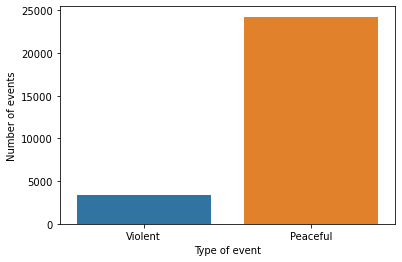

In [15]:
# visualize the baseline accuracy
base = sns.countplot(data=protest,x=y)
base.set_xticklabels(['Violent','Peaceful'])
plt.ylabel('Number of events')
plt.xlabel('Type of event')
plt.show()

______
# Count Vectorizer

In [16]:
# Split the data into the training and testing sets. 
# Stratify to target so that the test and train target values remain evenly proportioned.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [17]:
stopword = stopwords.words('english')
stop_word2 = ['size','2020','people','june','group']
stopword.extend(stop_word2)

In [18]:
cv = CountVectorizer(min_df=2,max_df=.98,stop_words=(stopword)) # Instantiate Count Vectorizer
cv_train = cv.fit_transform(X_train) # fit and transform on training data
cv_test =  cv.transform(X_train)

In [19]:
cv_train_df = pd.DataFrame(cv_train.todense(),columns=cv.get_feature_names()) # CV into dataframe

In [20]:
cv_train_df.sum().sort_values(ascending=False).head(20) # find the most word occurances in the df (top 20)

police         12118
support        10842
black          10186
protest         9870
lives           8822
matter          8597
report          8305
movement        7990
brutality       6411
gathered        4978
floyd           4606
george          4549
death           4513
staged          4348
coronavirus     3963
protesters      3641
new             3525
protested       3248
hundreds        3136
100             3067
dtype: int64

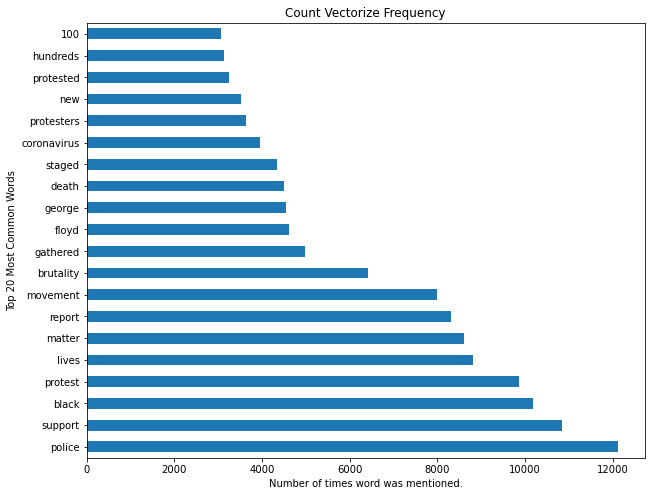

In [21]:
# Plot top 20 words
plt.figure(figsize=(10,8))
cv_train_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
plt.xlabel("Number of times word was mentioned.")
plt.ylabel("Top 20 Most Common Words")
plt.title("Count Vectorize Frequency");

__________
# TF-ID Vectorizer

In [22]:
tf = TfidfVectorizer(min_df=2,max_df=.98,stop_words=stopword) # use same params as CV
# convert training data to dataframe
tf_train = pd.DataFrame(tf.fit_transform(X_train).todense(), columns=tf.get_feature_names())

In [23]:
tf_train.sum().sort_values(ascending=False).head(20)

police         962.555422
black          871.590004
support        848.644681
lives          805.631017
matter         795.938266
protest        790.636857
movement       771.160224
brutality      716.558906
report         709.520007
floyd          572.975770
george         564.980493
death          547.918949
staged         525.904725
hundreds       502.330901
gathered       458.539427
100            451.322337
new            412.226975
coronavirus    395.218174
protested      394.706052
marched        384.321424
dtype: float64

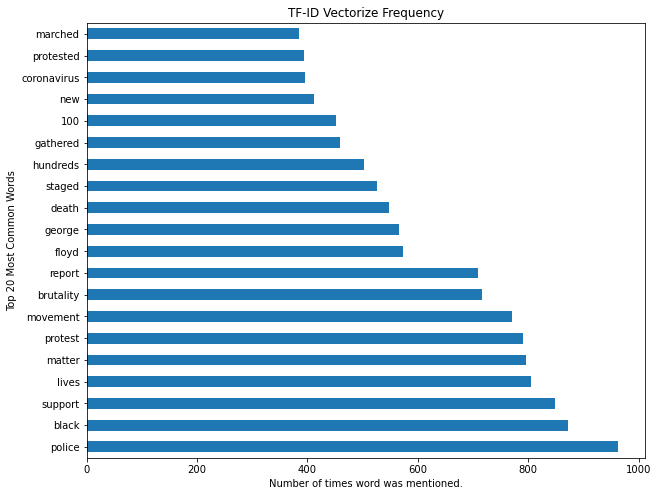

In [24]:
# plot top occuring words
plt.figure(figsize=(10,8))
tf_train.sum().sort_values(ascending=False).head(20).plot(kind='barh');
plt.xlabel("Number of times word was mentioned.")
plt.ylabel("Top 20 Most Common Words")
plt.title("TF-ID Vectorize Frequency");

In [25]:
protest.to_csv('../Data/integrated_protest_gb.csv', index=False)

### Reference 'Modeling.ipynb' for Count Vectorizer and TF-ID Vectorizer pipeline models

_______
# Sentimental Analysis

In [26]:
# generate a loop that will consolidate all polarity scores into one list
# instantiate the SIA() and append each score to a list
# convert list into a dataframe
sia = SentimentIntensityAnalyzer()
scores = []
for each in protest['notes']:
    current_scores = sia.polarity_scores(each)
    scores.append(current_scores)
    

In [27]:
scores_df = pd.DataFrame(scores) # convert scores list into dataframe

In [28]:
scores_df # view the dataframe

,neg,neu,pos,compound
0,0.064,0.784,0.153,0.6369
1,0.000,0.723,0.277,0.8625
2,0.147,0.779,0.074,-0.7184
3,0.103,0.850,0.047,-0.3400
4,0.163,0.807,0.030,-0.7430
...,...,...,...,...
27624,0.033,0.853,0.114,0.6705
27625,0.085,0.915,0.000,-0.6486
27626,0.060,0.833,0.107,0.2960
27627,0.212,0.674,0.114,-0.8910


In [29]:
# concate protest notes by it's sentimental analysis ratings
quote_sia = pd.concat([protest[['Peaceful protest','notes']], scores_df], axis=1)# combine two dataframes side by side

In [30]:
quote_sia

,Peaceful protest,notes,neg,neu,pos,compound
0,1,"On 1 January 2020, an unknown number of people...",0.064,0.784,0.153,0.6369
1,1,"On 1 January 2020, people held a peace march o...",0.000,0.723,0.277,0.8625
2,1,"On 1 January 2020, a group of people gathered ...",0.147,0.779,0.074,-0.7184
3,1,"On 1 January 2020, a group of people gathered ...",0.103,0.850,0.047,-0.3400
4,1,"On 1 January 2020, protesters against Oklahoma...",0.163,0.807,0.030,-0.7430
...,...,...,...,...,...,...
27624,1,"On 5 March 2021, between a dozen and 40 studen...",0.033,0.853,0.114,0.6705
27625,1,"On 5 March 2021, over a dozen members of PETA ...",0.085,0.915,0.000,-0.6486
27626,1,"On 5 March 2021, parents protested in Verona (...",0.060,0.833,0.107,0.2960
27627,1,"On 5 March 2021, relatives of more than a doze...",0.212,0.674,0.114,-0.8910


### Top 5 MOST Neutral according to vader

In [31]:
quote_sia.sort_values(by='neu',ascending=False).head(5)

,Peaceful protest,notes,neg,neu,pos,compound
16839,1,"On 18 August 2020, a rally was held in Richmon...",0.0,1.0,0.0,0.0
24042,1,"On 21 November 2020, people rallied in Hauppau...",0.0,1.0,0.0,0.0
24012,1,"On 21 November 2020, between 80 and 100 people...",0.0,1.0,0.0,0.0
24040,0,"Training: On 21 November 2020, the Utah Consti...",0.0,1.0,0.0,0.0
1022,1,"On 24 January 2020, members of Covered Califor...",0.0,1.0,0.0,0.0


In [34]:
# generate the most negative protest note
neutral = quote_sia.sort_values(by='neu',ascending=False) # sort from most to least
neutral_1 = [x for x in neutral['notes']] # used list comprehension to show each value to ['notes']
neutral_1[0] # show first index

'On 18 August 2020, a rally was held in Richmond (Virginia) to call for police reform. [size=no report]'

### Top 5 MOST NEGATIVE according to vader

In [35]:
quote_sia.sort_values(by='neg',ascending=False).head(5)

,Peaceful protest,notes,neg,neu,pos,compound
12946,1,"On 2 July 2020, an unknown number of relatives...",0.448,0.448,0.104,-0.9393
13446,1,"On 7 July 2020, an unknown number of people jo...",0.436,0.541,0.023,-0.9741
15610,1,"On 1 August 2020, people protested in Topeka, ...",0.429,0.571,0.000,-0.8591
16144,1,"On 8 August 2020, dozens of people joined a 'S...",0.422,0.578,0.000,-0.9081
14944,1,"On 25 July 2020, dozens of protested in Spring...",0.421,0.579,0.000,-0.7906


In [36]:
# generate the most negative protest note
negative = quote_sia.sort_values(by='neg',ascending=False)# sort from most to least
negative_1 = [x for x in negative['notes']] # used list comprehension to show each value to ['notes']
negative_1[0] # show first index

'On 2 July 2020, an unknown number of relatives and friends of a teenager died from gun violence rallied in Atlanta (Fulton, Georgia) to denounce gun violence. [size=no report]'

### Top 5 MOST POSITIVE according to vader

In [37]:
quote_sia.sort_values(by='pos',ascending=False).head(5)

,Peaceful protest,notes,neg,neu,pos,compound
20397,1,"On 26 September 2020, about 80 people marched ...",0.000,0.638,0.362,0.8807
16107,1,"On 8 August 2020, pro-police supporters held a...",0.080,0.560,0.360,0.7906
11120,1,"On 16 June 2020, LGBTQ demonstrators protested...",0.055,0.590,0.354,0.8442
7266,1,"On 4 June 2020, hundreds of people supporting ...",0.139,0.515,0.345,0.7906
1898,1,"On 25 February 2020, members of the United Dom...",0.061,0.593,0.345,0.9246


In [38]:
# generate the most positve protest note
positive = quote_sia.sort_values(by='pos',ascending=False)# sort from most to least
positive_1 = [x for x in positive['notes']] # used list comprehension to show each value to ['notes']
positive_1[0] # show first index

'On 26 September 2020, about 80 people marched in a rally in Buffalo Grove (Illinois) for promoting peace and love. [size=about 80]'